In [9]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
#建立Features
datasets=pd.read_table("PEER_Dataset.txt",sep='\s+')
datasets=pd.DataFrame(datasets)
feature=datasets.iloc[:,0:13]
#特征归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler=MinMaxScaler(feature_range=(0,1))
# feature=scaler.fit_transform(feature)

# scaler = StandardScaler()
# feature=scaler.fit_transform(feature)

feature=pd.DataFrame(feature)

#建立Targets
target=[]
labels=["Flexure","Flexure-Shear","Shear"]
for i in datasets.iloc[:,13]:
    if i=="Flexure":
        target.append(0)
    if i == "Flexure-Shear":
        target.append(1)
    if i=="Shear":
        target.append(2)

#样本划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=666,test_size=0.3)

draw_color=np.array([])
for i in target:
    if i==0:
        draw_color=np.append(draw_color,'#283c63')
    if i==1:
        draw_color=np.append(draw_color,'#07689f')
    if i==2:
        draw_color=np.append(draw_color,'#f85f73')

Text(0, 0.5, 'Practical results')

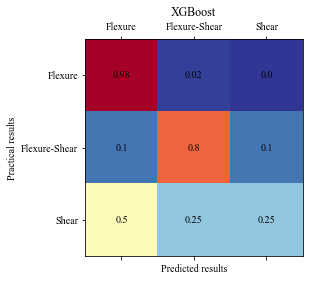

In [10]:
model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500,n_jobs=-1)
model.fit(X_train,y_train)

#使用训练后的模型对测试集进行预测，并计算预测值与实际之间的acc值
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, y_pred,labels=[0,1,2])
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

fig,ax = plt.subplots()
ax.matshow(norm_conf_mx,cmap='RdYlBu_r')

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(norm_conf_mx[i, j],2),ha="center", va="center", color="k")

ax.set_title("XGBoost")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted results")
ax.set_ylabel("Practical results")

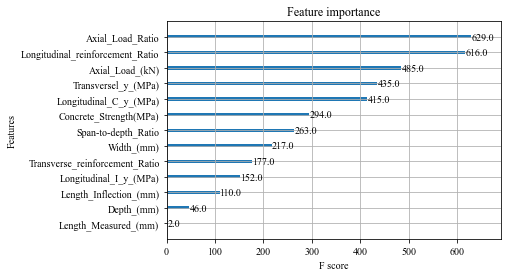

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plot_importance(model)
plt.show()

In [12]:
#调参
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
#创建模型及参数搜索空间
model_GS = XGBClassifier()
learning_rate = [0.00001,0.001,0.01,0.1,0.2,0.3]
max_depth = [1,2,3,4,5]
n_estimators=[100,200,300,400,500]
param_grid = dict(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_estimators)

#设置分层抽样验证及创建搜索对象
kflod = StratifiedKFold(n_splits=10,shuffle=True,random_state=666)
grid_search = GridSearchCV(model_GS,param_grid=param_grid,scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train,y_train)

y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:{:.2f}".format(accuracy * 100.0))
grid_result.best_score_,grid_result.best_params_

accuracy:96.00


(0.9199999999999999,
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500})

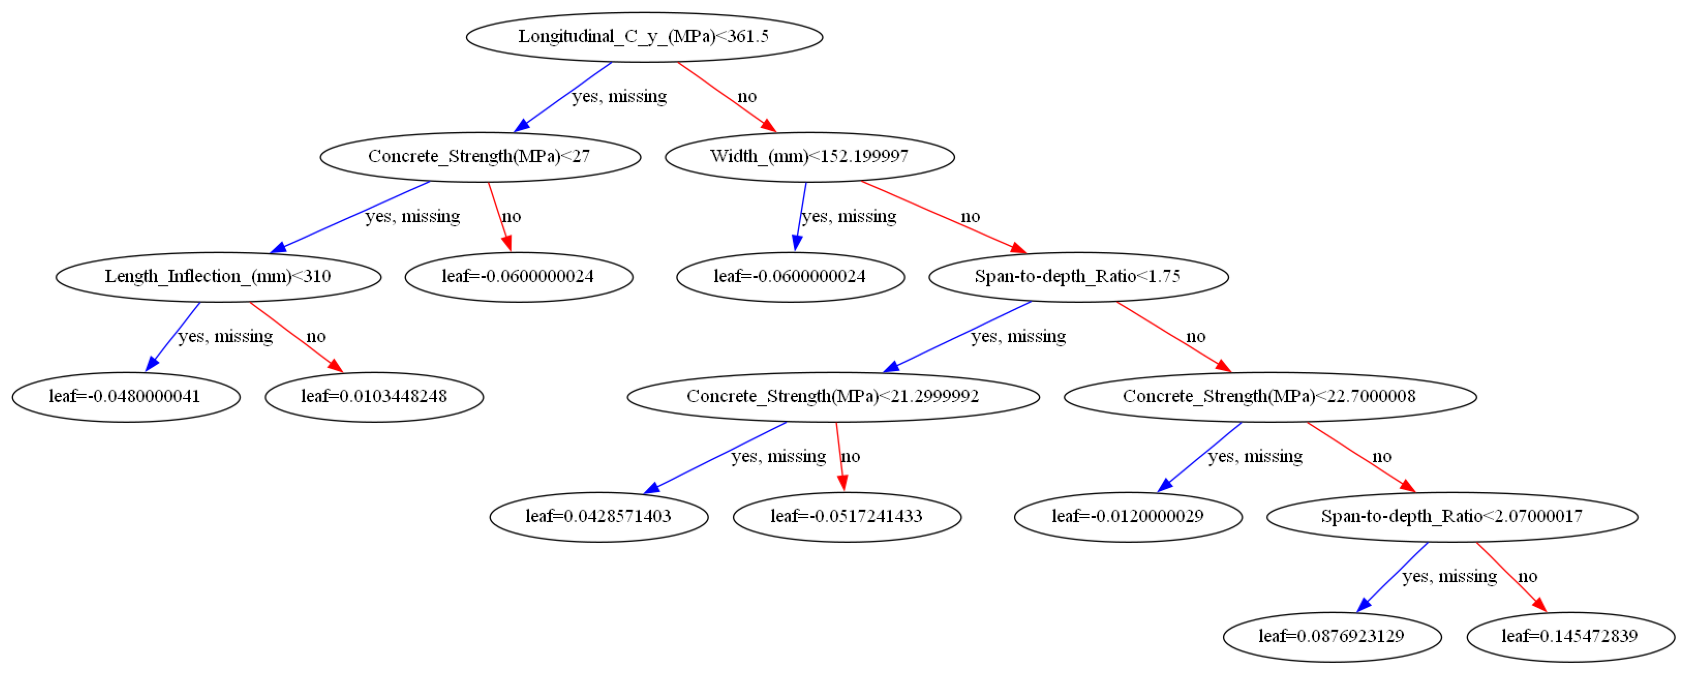

In [13]:
#画出模型树图
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from xgboost import plot_tree
_, ax = plt.subplots(figsize=(30, 30))
plot_tree(model, ax=ax, num_trees=0)
plt.show()